<a href="https://colab.research.google.com/github/aidaaminian/snn-self-driving/blob/main/bproj_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Install and Import

In [1]:
!gdown --id 1BuZNKbH3qWgedopUGwW9Gfue7oCbBTDm

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1BuZNKbH3qWgedopUGwW9Gfue7oCbBTDm
To: /content/traffic-sign-yolo.zip
100% 261M/261M [00:04<00:00, 56.3MB/s]


In [2]:
!unzip "/content/traffic-sign-yolo.zip" -d "/content/"

Archive:  /content/traffic-sign-yolo.zip
   creating: /content/traffic-sign-yolo/
  inflating: /content/traffic-sign-yolo/00000.jpg  
  inflating: /content/traffic-sign-yolo/00000.txt  
  inflating: /content/traffic-sign-yolo/00001.jpg  
  inflating: /content/traffic-sign-yolo/00001.txt  
  inflating: /content/traffic-sign-yolo/00002.jpg  
  inflating: /content/traffic-sign-yolo/00002.txt  
  inflating: /content/traffic-sign-yolo/00003.jpg  
  inflating: /content/traffic-sign-yolo/00003.txt  
  inflating: /content/traffic-sign-yolo/00004.jpg  
  inflating: /content/traffic-sign-yolo/00004.txt  
  inflating: /content/traffic-sign-yolo/00005.jpg  
  inflating: /content/traffic-sign-yolo/00005.txt  
  inflating: /content/traffic-sign-yolo/00006.jpg  
  inflating: /content/traffic-sign-yolo/00006.txt  
  inflating: /content/traffic-sign-yolo/00007.jpg  
  inflating: /content/traffic-sign-yolo/00007.txt  
  inflating: /content/traffic-sign-yolo/00008.jpg  
  inflating: /content/traffic-sign

In [3]:
!pip install nengo
!pip install nengo-dl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.3/535.3 kB 13.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.2/286.2 kB 11.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for nengo-dl: filename=nengo_dl-3.6.0-py3-none-any.whl size=204190 sha256=1ba91950b3a5d62cd615452040867c11745cc49e47f0789fb6ab7e92dd969d7b
  Stored in directory: /root/.cache/pip/wheels/99/98/1a/c238f79c953dec26b4345dc4aa1a9b7b0b250bac1018985465
Successfully built nengo-dl


In [2]:
%matplotlib inline
import nengo
import nengo_dl
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlretrieve
import skimage

### Load Data

In [3]:
IMG_HEIGHT = 240
IMG_WIDTH = 240
MINIBATCH_SIZE = 32
N_STEPS = 10

In [4]:
dir_path = '/content/'

In [5]:
import cv2
import glob
image_list = []
for filename in glob.glob(dir_path + 'traffic-sign-yolo/*.jpg'):
    image = cv2.imread (filename)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    image = cv2.resize(image,(240,240))
    image_list.append (image)

### Data Preprocessing

In [6]:
np.array(image_list).shape

(741, 240, 240, 3)

In [7]:
image_list = np.array(image_list, dtype=np.float32) /255

In [8]:
noise_data = skimage.util.random_noise(image_list, mode="gaussian")

In [9]:
noise_data = np.array(noise_data*255, dtype=np.uint8)

In [10]:
image_list = np.array(image_list*255, dtype=np.uint8)

In [11]:
noise_data

array([[[[248, 219, 225],
         [223, 235, 212],
         [192, 238, 177],
         ...,
         [199, 252, 173],
         [175, 193, 224],
         [196, 203, 243]],

        [[ 35,  38,  45],
         [ 63,   0,   9],
         [  0,  20,  12],
         ...,
         [ 53,  90,  47],
         [ 67,  74,  95],
         [ 21, 114,  66]],

        [[ 37,  17,   7],
         [ 30,   0,  52],
         [ 36,  48,  47],
         ...,
         [ 20,  72,  51],
         [ 22,  53,  38],
         [ 78,  71,  17]],

        ...,

        [[  0,  35,  26],
         [ 23,  36,  48],
         [  3,  18,  51],
         ...,
         [  0,  13,   0],
         [  0,  23,   0],
         [ 30,  48,   5]],

        [[ 40,   0,   0],
         [ 16,  36,  36],
         [  0,  32,   0],
         ...,
         [ 41,  60,   0],
         [  0,  19,   0],
         [ 10,   0,  35]],

        [[ 80,  83,  34],
         [ 25,  21,  30],
         [ 44,  44,  35],
         ...,
         [  2,  38,   0],
        

In [12]:
image_list

array([[[[216, 216, 207],
         [217, 217, 214],
         [217, 217, 213],
         ...,
         [222, 221, 212],
         [223, 222, 208],
         [211, 222, 214]],

        [[ 26,  26,  16],
         [ 29,  28,  26],
         [ 28,  27,  27],
         ...,
         [ 73,  55,  54],
         [ 76,  60,  53],
         [ 43,  65,  56]],

        [[ 26,  26,  15],
         [ 29,  27,  28],
         [ 29,  28,  31],
         ...,
         [ 65,  56,  53],
         [ 73,  58,  51],
         [ 45,  66,  56]],

        ...,

        [[ 30,  31,  18],
         [ 33,  34,  39],
         [ 35,  36,  39],
         ...,
         [ 11,  10,  10],
         [  9,  11,  10],
         [  7,  11,  11]],

        [[ 29,  31,  18],
         [ 33,  34,  39],
         [ 34,  35,  36],
         ...,
         [ 12,  11,  12],
         [ 13,  15,  14],
         [  9,  13,  14]],

        [[ 29,  31,  18],
         [ 33,  34,  39],
         [ 32,  34,  34],
         ...,
         [ 15,  14,  14],
        

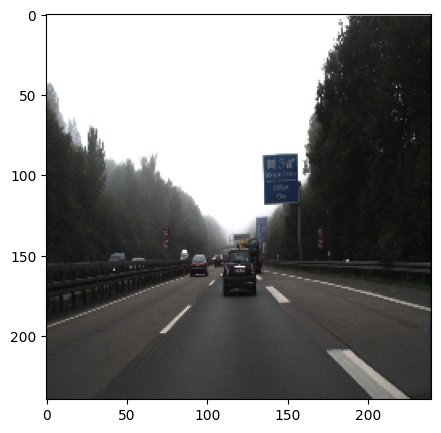

In [13]:
plt.figure(figsize=(5,5))
plt.imshow(image_list[8])
plt.show()

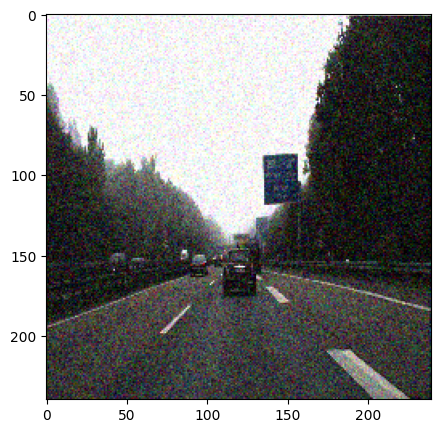

In [14]:
plt.figure(figsize=(5,5))
plt.imshow(noise_data[8])
plt.show()

In [15]:
train_data = np.reshape(image_list, (len(image_list), -1))
test_data = np.reshape(noise_data, (len(noise_data), -1))

In [16]:
del noise_data
del image_list

In [17]:
train_data.shape

(741, 172800)

### Autoencoder Network

In [18]:
with nengo.Network(seed = 0) as auto_net:
    auto_net.config[nengo.Ensemble].max_rates = nengo.dists.Choice([200])
    auto_net.config[nengo.Ensemble].intercepts = nengo.dists.Choice([0])
    auto_net.config[nengo.Connection].synapse = None

    n_type = nengo.SpikingRectifiedLinear()
    n_in = IMG_HEIGHT*IMG_WIDTH*3
    dim_hidden = 512

    input_node = nengo.Node(np.zeros(n_in))

    layer1 = nengo.Ensemble(dim_hidden, 1, neuron_type = n_type)
    nengo.Connection(input_node, layer1.neurons, transform=nengo_dl.dists.Glorot())

    layer2 = nengo.Ensemble(dim_hidden, 1, neuron_type = n_type)
    nengo.Connection(layer1.neurons, layer2.neurons, transform=nengo_dl.dists.Glorot())

    outp = nengo.Ensemble(n_in, 1, neuron_type=n_type)
    nengo.Connection(layer2.neurons, outp.neurons, transform=nengo_dl.dists.Glorot())

    p_c = nengo.Probe(outp.neurons)
    p_c_filt = nengo.Probe(outp.neurons, synapse=0.01, label="out_p_filt")

In [19]:
with nengo_dl.Simulator(network=auto_net, minibatch_size=MINIBATCH_SIZE) as sim:
  sim.predict(np.ones((MINIBATCH_SIZE, 1, n_in)));

Build finished in 0:00:03                                                      
Optimization finished in 0:00:00                                               
Construction finished in 0:00:05                                               
|           Constructing graph: pre-build stage (0%)           | ETA:  --:--:--

/usr/local/lib/python3.10/dist-packages/nengo_dl/simulator.py:1003: UserWarning: Running for one timestep, but the network contains synaptic filters (which will introduce at least a one-timestep delay); did you mean to set synapse=None?
  warnings.warn(


1/1 [==============================] - 5s 5s/step


### Train Model

In [20]:
for net_ens in auto_net.all_ensembles:
  net_ens.gain = nengo.dists.Choice([1])
  net_ens.bias = nengo.dists.Choice([0])

In [21]:
for conn in auto_net.all_connections:
  conn.synapse = None

In [22]:
train_data.shape

(741, 172800)

In [23]:
train_data = train_data[:, None, :]

In [24]:
train_data.shape

(741, 1, 172800)

In [25]:
test_data = np.tile(test_data[:, None, :], (1, N_STEPS, 1))

In [26]:
test_data.shape

(741, 10, 172800)

In [27]:
train_data

array([[[216, 216, 207, ...,   8,  14,  14]],

       [[255, 255, 255, ...,  37,  69,  69]],

       [[255, 255, 253, ...,  40,  63,  59]],

       ...,

       [[255, 255, 255, ...,  13,  25,  23]],

       [[245, 252, 252, ...,  94, 120, 115]],

       [[252, 252, 240, ...,  78,  95,  88]]], dtype=uint8)

In [28]:
test_data

array([[[248, 219, 225, ...,   6,  12,  35],
        [248, 219, 225, ...,   6,  12,  35],
        [248, 219, 225, ...,   6,  12,  35],
        ...,
        [248, 219, 225, ...,   6,  12,  35],
        [248, 219, 225, ...,   6,  12,  35],
        [248, 219, 225, ...,   6,  12,  35]],

       [[255, 211, 255, ...,  27,  44,  75],
        [255, 211, 255, ...,  27,  44,  75],
        [255, 211, 255, ...,  27,  44,  75],
        ...,
        [255, 211, 255, ...,  27,  44,  75],
        [255, 211, 255, ...,  27,  44,  75],
        [255, 211, 255, ...,  27,  44,  75]],

       [[249, 228, 255, ...,  29,  72,  23],
        [249, 228, 255, ...,  29,  72,  23],
        [249, 228, 255, ...,  29,  72,  23],
        ...,
        [249, 228, 255, ...,  29,  72,  23],
        [249, 228, 255, ...,  29,  72,  23],
        [249, 228, 255, ...,  29,  72,  23]],

       ...,

       [[255, 221, 255, ...,  27,  43,   0],
        [255, 221, 255, ...,  27,  43,   0],
        [255, 221, 255, ...,  27,  43,   0

In [29]:
with nengo_dl.Simulator(auto_net, minibatch_size=MINIBATCH_SIZE) as sim:
  sim.compile(optimizer = tf.optimizers.Adam(1e-5),
              loss = {p_c: tf.losses.mse,
                      p_c_filt: None}
             )
  sim.fit(train_data, train_data, epochs = 3000)
  sim.freeze_params(auto_net)
  sim.save_params("./my_saved_params3")
  output = sim.predict(test_data[:MINIBATCH_SIZE])

|############         Building network (20%)                     | ETA: 0:00:00

/usr/local/lib/python3.10/dist-packages/nengo/builder/ensemble.py:112: NengoWarning: Specifying the gains and biases for <Ensemble (unlabeled) at 0x7ff8d83e75b0> imposes a set of maximum firing rates and intercepts. Further specifying either max_rates or intercepts has no effect.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/nengo/builder/ensemble.py:112: NengoWarning: Specifying the gains and biases for <Ensemble (unlabeled) at 0x7ff8d83e6530> imposes a set of maximum firing rates and intercepts. Further specifying either max_rates or intercepts has no effect.
  warnings.warn(


|#####################Building network (40%)                     | ETA: 0:00:01

/usr/local/lib/python3.10/dist-packages/nengo/builder/ensemble.py:112: NengoWarning: Specifying the gains and biases for <Ensemble (unlabeled) at 0x7ff8d83e7430> imposes a set of maximum firing rates and intercepts. Further specifying either max_rates or intercepts has no effect.
  warnings.warn(


Build finished in 0:00:03                                                      
Optimization finished in 0:00:00                                               
Construction finished in 0:00:01                                               


/usr/local/lib/python3.10/dist-packages/nengo_dl/simulator.py:1892: UserWarning: Number of elements in input data (741) is not evenly divisible by Simulator.minibatch_size (32); input data will be truncated.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/nengo_dl/simulator.py:1736: UserWarning: Number of elements (1) in ['ndarray'] does not match number of Probes (2); consider using an explicit input dictionary in this case, so that the assignment of data to objects is unambiguous.
  warnings.warn(


Streaming output truncated to the last 5000 lines.
Epoch 502/3000
23/23 [==============================] - 1s 64ms/step - loss: 1254.6140 - probe_loss: 1254.6140
Epoch 503/3000
23/23 [==============================] - 1s 63ms/step - loss: 1252.1862 - probe_loss: 1252.1862
Epoch 504/3000
23/23 [==============================] - 1s 64ms/step - loss: 1249.9956 - probe_loss: 1249.9956
Epoch 505/3000
23/23 [==============================] - 2s 68ms/step - loss: 1247.8093 - probe_loss: 1247.8093
Epoch 506/3000
23/23 [==============================] - 1s 64ms/step - loss: 1246.7572 - probe_loss: 1246.7572
Epoch 507/3000
23/23 [==============================] - 1s 64ms/step - loss: 1245.2126 - probe_loss: 1245.2126
Epoch 508/3000
23/23 [==============================] - 1s 63ms/step - loss: 1244.5468 - probe_loss: 1244.5468
Epoch 509/3000
23/23 [==============================] - 1s 64ms/step - loss: 1242.6101 - probe_loss: 1242.6101
Epoch 510/3000
23/23 [==============================] - 1s 64

In [30]:
# with nengo_dl.Simulator(auto_net, minibatch_size=MINIBATCH_SIZE) as sim2:
#     sim2.load_params("./my_saved_params")

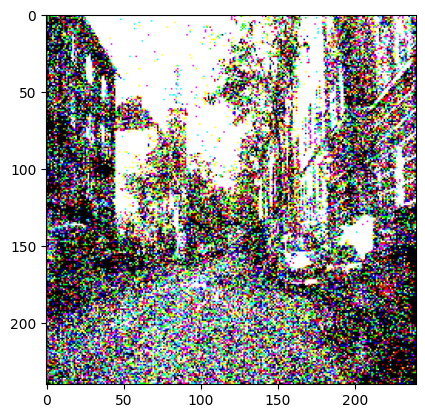

In [31]:
plt.figure()
plt.imshow(output[p_c_filt][0,7].reshape((240, 240, 3)))

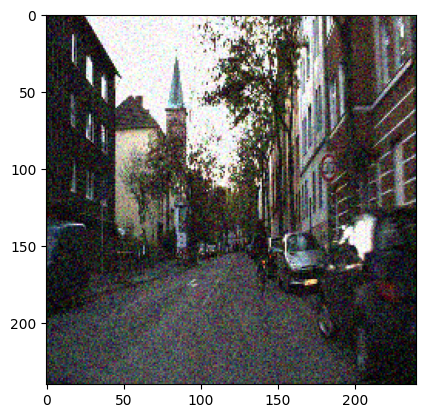

In [32]:
plt.imshow(test_data[0, 7].reshape(240, 240, 3))